In [21]:
from datetime import datetime
from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [22]:
universe = pd.read_csv('/Users/henrywzh/Documents/data/us_big.csv')
universe.set_index('Date', inplace=True)

In [23]:
rand_factor = np.random.normal(size=len(universe))

In [24]:
u_2010 = universe[universe.index >= '2010-01-01']

In [18]:
def test_factor(x: pd.Series, fast: int, slow: int):
    # x is the price
    # ma 50:
    ma_fast = x.rolling(fast).mean()
    ma_slow = x.rolling(slow).mean()
    
    

In [43]:
x = u_2010['AAPL']
rets = x.pct_change()
ratio = (x.rolling(50).mean() - x.rolling(250).mean()) / x.rolling(250).mean()
x = x[x.index >= ratio.index[0]]
rets = rets[rets.index >= ratio.index[0]]

rolling_rets = x.shift(-42) / x - 1
rolling_rets

Date
2010-01-04    0.023083
2010-01-05    0.021923
2010-01-06    0.057117
2010-01-07    0.067718
2010-01-08    0.063779
                ...   
2024-08-06         NaN
2024-08-07         NaN
2024-08-08         NaN
2024-08-09         NaN
2024-08-12         NaN
Name: AAPL, Length: 3676, dtype: float64

<Axes: xlabel='Date'>

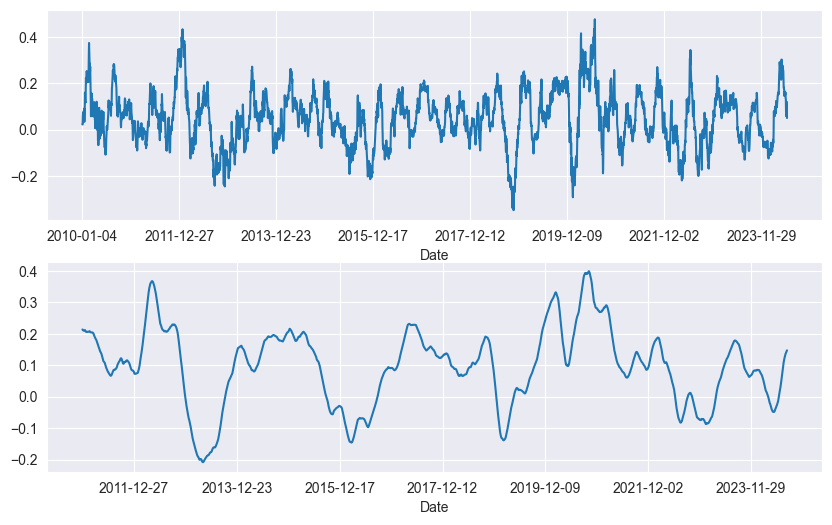

In [53]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
rolling_rets.plot()

plt.subplot(2, 1, 2)
ratio.plot()

ratio = fast / slow - 1
- ratio > 0: recent prices are above the historic average

<Axes: xlabel='Date'>

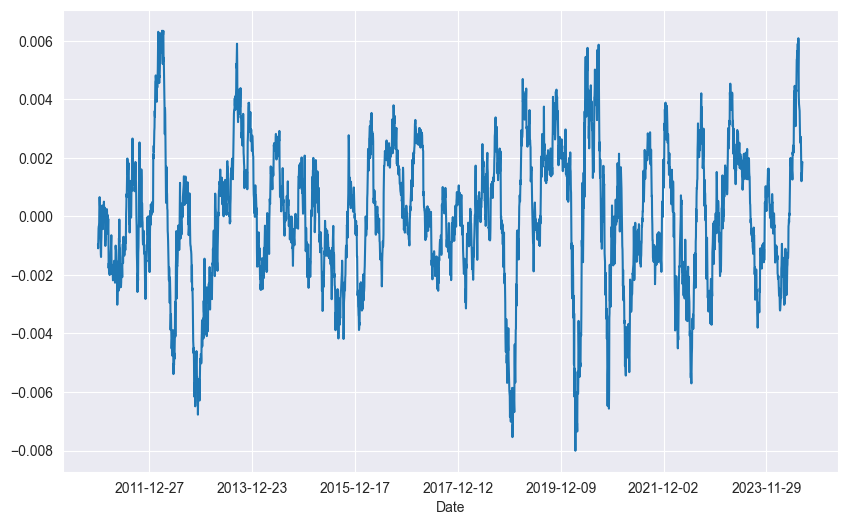

In [52]:
plt.figure(figsize=(10, 6))
ratio.diff().plot()